<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Final_Arrest_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Copy of Arrest_Data_from_2010_to_Present.csv')
data.head(5)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location
0,4248313,02/24/2015,1310.0,20.0,Olympic,2022.0,37.0,M,H,5.0,Burglary,F,459PC,BURGLARY,5TH,WILTON,"(34.0653, -118.314)"
1,191811472,05/03/2019,1700.0,18.0,Southeast,1802.0,23.0,F,B,NaN,NaN,M,653.22 PC,NaN,91ST,FIGUEROA,"(33.9543, -118.2827)"
2,4254777,02/26/2015,2010.0,19.0,Mission,1985.0,22.0,M,H,6.0,Larceny,M,459.5PC,SHOPLIFTING,8300 VAN NUYS BL,NaN,"(34.2216, -118.4488)"
3,5614161,04/29/2019,1040.0,8.0,West LA,842.0,41.0,M,H,3.0,Robbery,F,211PC,ROBBERY,11600 WILSHIRE BL,NaN,"(34.0508, -118.4592)"
4,5615197,04/30/2019,615.0,6.0,Hollywood,663.0,27.0,M,O,5.0,Burglary,F,459PC,BURGLARY,LA BREA,LEXINGTON,"(34.0907, -118.3384)"


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227521 entries, 0 to 1227520
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Report ID                 1227521 non-null  object 
 1   Arrest Date               1227517 non-null  object 
 2   Time                      1227322 non-null  float64
 3   Area ID                   1227517 non-null  float64
 4   Area Name                 1227517 non-null  object 
 5   Reporting District        1227517 non-null  float64
 6   Age                       1227517 non-null  float64
 7   Sex Code                  1227517 non-null  object 
 8   Descent Code              1227517 non-null  object 
 9   Charge Group Code         1139951 non-null  float64
 10  Charge Group Description  1139515 non-null  object 
 11  Arrest Type Code          1227516 non-null  object 
 12  Charge                    1227516 non-null  object 
 13  Charge Description        1

In [17]:
#Data Cleaning

to_drop =['Charge Group Code','Charge Description','Cross Street']
data.drop(columns=to_drop,axis=1,inplace=True)
data.head(10)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Description,Arrest Type Code,Charge,Address,Location
0,4248313,02/24/2015,1310.0,20.0,Olympic,2022.0,37.0,M,H,Burglary,F,459PC,5TH,"(34.0653, -118.314)"
1,191811472,05/03/2019,1700.0,18.0,Southeast,1802.0,23.0,F,B,NaN,M,653.22 PC,91ST,"(33.9543, -118.2827)"
2,4254777,02/26/2015,2010.0,19.0,Mission,1985.0,22.0,M,H,Larceny,M,459.5PC,8300 VAN NUYS BL,"(34.2216, -118.4488)"
3,5614161,04/29/2019,1040.0,8.0,West LA,842.0,41.0,M,H,Robbery,F,211PC,11600 WILSHIRE BL,"(34.0508, -118.4592)"
4,5615197,04/30/2019,615.0,6.0,Hollywood,663.0,27.0,M,O,Burglary,F,459PC,LA BREA,"(34.0907, -118.3384)"
5,5615701,04/30/2019,1100.0,9.0,Van Nuys,901.0,2.0,F,H,NaN,D,300(B)WIC,RAYMER,"(34.2149, -118.4674)"
6,4256466,02/28/2015,1430.0,18.0,Southeast,1824.0,22.0,M,B,Burglary,F,459PC,103RD,"(33.947, -118.2594)"
7,4256564,02/28/2015,1715.0,10.0,West Valley,1039.0,16.0,M,H,Robbery,F,211PC,VANOWEN,"(34.1939, -118.4836)"
8,5616892,05/01/2019,1710.0,12.0,77th Street,1245.0,28.0,F,B,Robbery,F,211PC,VERMONT,"(33.9746, -118.2918)"
9,5617003,05/01/2019,1010.0,16.0,Foothill,1601.0,39.0,M,H,NaN,O,21 841A1US,FOOTHILL BL,"(34.2868, -118.4081)"


In [18]:
data['Arrest Date']= data['Arrest Date'].fillna(data['Arrest Date'].min)
data['Area Name']= data['Area Name'].fillna(data['Area Name'].min)
data['Reporting District']= data['Reporting District'].fillna(data['Reporting District'].min)
data['Charge Group Description']= data['Charge Group Description'].dropna()
data['Time']= data['Time'].interpolate()
data = data.dropna()
data['Charge Group Description'].isnull().sum()

0

In [19]:
data.isnull().sum()

Report ID                   0
Arrest Date                 0
Time                        0
Area ID                     0
Area Name                   0
Reporting District          0
Age                         0
Sex Code                    0
Descent Code                0
Charge Group Description    0
Arrest Type Code            0
Charge                      0
Address                     0
Location                    0
dtype: int64

In [20]:
data['Arrest Date'] = pd.to_datetime(data['Arrest Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139514 entries, 0 to 1227515
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Report ID                 1139514 non-null  object        
 1   Arrest Date               1139514 non-null  datetime64[ns]
 2   Time                      1139514 non-null  float64       
 3   Area ID                   1139514 non-null  float64       
 4   Area Name                 1139514 non-null  object        
 5   Reporting District        1139514 non-null  object        
 6   Age                       1139514 non-null  float64       
 7   Sex Code                  1139514 non-null  object        
 8   Descent Code              1139514 non-null  object        
 9   Charge Group Description  1139514 non-null  object        
 10  Arrest Type Code          1139514 non-null  object        
 11  Charge                    1139514 non-null  object

In [21]:
data['year'] = data['Arrest Date'].dt.year
data['month'] = data['Arrest Date'].dt.month

In [22]:
#creation of datasets
data_2010to2018=data[(data['year']>=2010) & (data['year']<=2018) ]
new_datasets= data[data['year']==2018]

In [23]:
#Q1. How many bookings of arrestees were made in 2018?¶

new_datasets['Report ID'].count()

30332

In [24]:
#Q2.How many bookings of arrestees were made in the area with the most arrests in 2018?

new_datasets.groupby('Area Name')['Report ID'].count().reset_index().sort_values('Report ID',ascending=False).head(10)

,Area Name,Report ID
1,Central,5011
6,Hollywood,2798
13,Rampart,1935
12,Pacific,1700
17,Van Nuys,1532
9,Newton,1490
15,Southwest,1424
4,Harbor,1355
0,77th Street,1303
10,Northeast,1299


In [25]:
#Q3.There are differences between the average age of an arrestee for the various charge groups. Find the average age of arrestees per each charge group.

new_datasets.groupby('Charge Group Description')['Age'].mean().reset_index().sort_values('Age',ascending=False).drop(index=[19,17])

,Charge Group Description,Age
6,Drunkeness,44.219972
13,Liquor Laws,42.540955
3,Disorderly Conduct,41.924290
10,Gambling,40.557047
4,Disturbing the Peace,39.727273
0,Against Family/Child,36.950355
24,Sex (except rape/prst),36.555838
14,Miscellaneous Other Violations,36.252076
21,Rape,36.203704
16,Narcotic Drug Laws,36.097954


In [26]:
#Q4 What is the 95% quantile of the age of the arrestee in 2018? Only consider the following charge groups for your analysis

columns= ['Vehicle Theft' ,
'Robbery',
'Burglary',
'Receive Stolen Property']
my_quantile = new_datasets[new_datasets['Charge Group Description'].isin(columns)]['Age'].quantile(0.95)
my_quantile

52.0

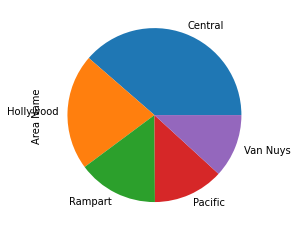

In [27]:
new_datasets['Area Name'].value_counts().head().plot(kind='pie')

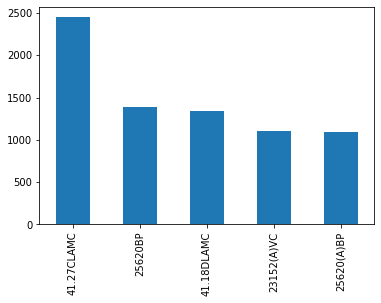

In [28]:
new_datasets['Charge'].value_counts().head().plot(kind='bar')

In [29]:
#Q5. Felony arrest incidents have been dropping over the years. Using a trend line (linear estimation) for the data from 2010 and 2018 (inclusive), what is the projected number of felony arrests in 2019? Round to the nearest integer. Note, the data set includes arrests for misdemeanor, felonies, etc.
#Disclaimer we select felony crime from our datasets but some crime can be classifed for both felony and misdemeanor

i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Larceny')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Other Assaults')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Receive Stolen Property')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Driving Under Influence')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Prostitution/Allied')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Moving Traffic Violations')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Liquor Laws')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Drunkeness')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Disturbing the Peace')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Gambling')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Non-Criminal Detention')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Pre-Delinquency')].index
data_2010to2018.drop(i,inplace =True)

In [31]:
data_2010to2018['Charge Group Description'].unique()

array(['Burglary', 'Robbery', 'Fraud/Embezzlement', 'Homicide',
       'Narcotic Drug Laws', 'Weapon (carry/poss)', 'Aggravated Assault',
       'Miscellaneous Other Violations', 'Vehicle Theft',
       'Against Family/Child', 'Forgery/Counterfeit',
       'Sex (except rape/prst)', 'Rape', 'Disorderly Conduct',
       'Federal Offenses'], dtype=object)

In [32]:
felony_dataset=data_2010to2018.copy()
felony_dataset=felony_dataset[['year','Charge Group Description']]
felony_dataset

,year,Charge Group Description
0,2015,Burglary
6,2015,Burglary
7,2015,Robbery
12,2015,Robbery
160,2016,Fraud/Embezzlement
...,...,...
1227510,2018,Aggravated Assault
1227511,2018,Vehicle Theft
1227512,2018,Miscellaneous Other Violations
1227513,2018,Weapon (carry/poss)


In [33]:
lb= LabelEncoder()

In [34]:
felony_dataset['Charge Group Description'] = lb.fit_transform(felony_dataset['Charge Group Description'])

In [35]:
gkk= felony_dataset.groupby('year')['Charge Group Description'].sum().reset_index().sort_values('year',ascending=False)
gkk

,year,Charge Group Description
8,2018,118117
7,2017,424309
6,2016,438237
5,2015,452215
4,2014,515645
3,2013,575965
2,2012,604878
1,2011,633715
0,2010,648551


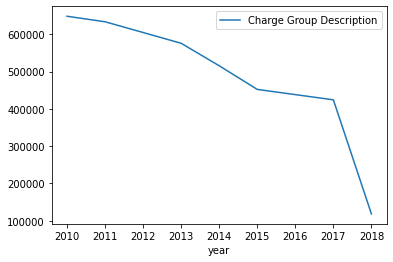

In [36]:
gkk.plot(x = "year", y = "Charge Group Description")

In [37]:
import numpy as np

In [38]:
#GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=10,learning_rate=1)
model.fit(gkk[['year']],gkk['Charge Group Description'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
model.score(gkk[['year']],gkk['Charge Group Description'])

1.0

In [40]:
#The projected number of felony arrests in 2019

arr= np.array([2019])
y_pred= model.predict([arr])
y_pred

array([118117.])

In [41]:
#LinearRegression

lr= LinearRegression()
lr.fit(gkk[['year']],gkk['Charge Group Description'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lr.score(gkk[['year']],gkk['Charge Group Description'])

0.8019076026604008

In [43]:
lr.coef_

array([-53449.76666667])

In [44]:
lr.intercept_

108138011.40000002

In [45]:
##equation of line
#y=-61389.86x + 124169391.8
#y=-61389.86(2019) + 124169391.8
#y= 223384.8

import numpy as np

In [46]:
#The projected number of felony arrests in 2019

arr= np.array([2019])
y_pred= lr.predict([arr])
y_pred

array([222932.5])

In [47]:
#Predicitions using Time Series (Learning Purpose(ignore))

gkks=gkk.copy()
gkks['year']=pd.to_datetime(gkks['year'])
gkks.set_index('year',inplace=True)

In [48]:
X = gkks.values
X

array([[118117],
       [424309],
       [438237],
       [452215],
       [515645],
       [575965],
       [604878],
       [633715],
       [648551]])

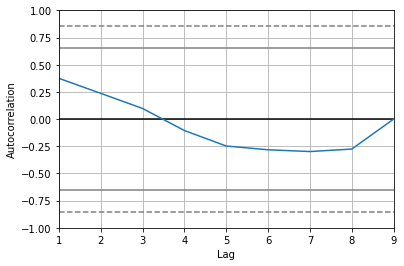

In [49]:
autocorrelation_plot(X)

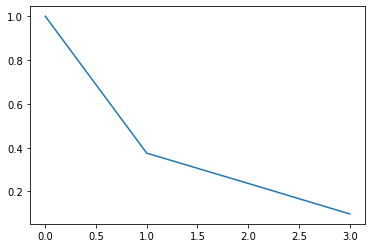

In [50]:
from statsmodels.tsa.stattools import acf,pacf
autor=acf(X,nlags=3)
par=pacf(X,nlags=3,method='ols')
pyplot.plot(autor,label='std')

In [51]:
import statsmodels.api as sms

In [52]:
model = sms.tsa.statespace.SARIMAX(X,order=(1,0,0))
result = model.fit()
print(result.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -118.940
Date:                Wed, 25 Aug 2021   AIC                            241.880
Time:                        23:19:40   BIC                            242.275
Sample:                             0   HQIC                           241.029
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9738      0.053     18.378      0.000       0.870       1.078
sigma2      1.149e+10    1.9e-13   6.04e+22      0.000    1.15e+10    1.15e+10
Ljung-Box (Q):                         nan   Jarque-

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

model = SARIMAX(X, order=(1, 3, 2,365))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(X), len(X)+1)
print(yhat)

ValueError: ignored

In [57]:
output = model_fit.forecast(4)[0]
print(output)

NameError: ignored

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
#Autoregression (AR)¶

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [ ]:
model=AR(X)
model_fit=model.fit()
model_fit.summary()

In [ ]:
yhat = model_fit.predict(len(X), len(X)+1)
print(yhat)
[689302.35315083 736392.47374395]

In [61]:
model_fit.aic

NameError: ignored

In [58]:
#Q6.How many arrest incidents occurred within 2 km from the Bradbury Building in 2018? Use (34.050536, -118.247861) for the coordinates of the Bradbury Building . For simplicity, please use the spherical Earth projected to a plane equation for calculating distances. Use the radius of the Earth as 6371 km. Note, some arrest records are missing location data and the location is listed as (0, 0). These records should not factor in your calculation.¶

from math import radians,degrees , asin,acos, sin,cos,sqrt,atan2,radians

In [59]:
def calculate_distances(coord):
    R=6371.0
    lat1=radians(34.050536)
    lon1=radians(-118.247861)
    lat2=radians(coord[0])
    lon2=radians(coord[1])
    dlon=lon2-lon1
    dlat=lat2-lat1

    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
    )

In [60]:
new_datasets["distance_Bradbury"]=new_datasets[(new_datasets['Location']!="(0,0)")&(pd.notna(new_datasets['Location']))]['Location'].apply(lambda x: calculate_distances([float(y) for y in x[1:-1].split(",")]))
arrests_within_2km = new_datasets["distance_Bradbury"][new_datasets["distance_Bradbury"] <= 2]
arrests_within_2km.shape

(5211,)